# Classification using Keras

<font size='3'> This is a "hello world" notebook for using neural network based classification. <br>
It works on the IRIS dataset and builds a simple 1-layer neural network using Tensorflow </font>

Prerequisites for running: Python3, Anaconda, Tensorflow and Keras installations

#### Import numpy, pandas, matplotlib and Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as K

Using TensorFlow backend.


#### Set log level for Tensorflow 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### Download the IRIS dataset if not already done

In [3]:
import urllib.request

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
localPath = '../../data/iris.data'

if not os.path.exists(localPath):
    print('Downloading data...')
    urllib.request.urlretrieve(url, localPath)
    print('Done')

#### Read and inspect the dataset using pandas

In [4]:
df = pd.read_csv(localPath, header=None, names=['F0', 'F1', 'F2', 'F3', 'Class'])
df.head()

,F0,F1,F2,F3,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,F0,F1,F2,F3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### The "Class" column in non-numeric:

In [6]:
df.Class.dtype

dtype('O')

#### and there are three possible values:

In [7]:
set(df.Class)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

#### Create a categorical data type with the three values:

In [8]:
from pandas.api.types import CategoricalDtype
outputType = CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#### and convert 'Class' to the newly created data type

In [9]:
df.Class = df.Class.astype(outputType)

In [10]:
df.Class.dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

In [11]:
df.Class.describe()

count                150
unique                 3
top       Iris-virginica
freq                  50
Name: Class, dtype: object

#### Split dataset into training and test set

In [12]:
np.random.seed(10)

totalNumRecords = len(df.index)
trainingDataSize = int(0.8*totalNumRecords)

randomPermutedIndices = np.random.permutation(totalNumRecords)
trainingDataIndices = randomPermutedIndices[:trainingDataSize]
testDataIndices = randomPermutedIndices[trainingDataSize:]

trainingData = df.iloc[trainingDataIndices]
testData = df.iloc[testDataIndices]

In [13]:
len(testData.index), len(trainingData.index), len(df)

(30, 120, 150)

#### Verify no overlap b/w train and test sets

In [14]:
set(testData.index).intersection(set(trainingData.index))

set()

#### Inspect class distributions in train and test set

In [15]:
print('\n Training set ')
print(trainingData.Class.value_counts())
print('\n Test set ')
print(testData.Class.value_counts())


 Training set 
Iris-versicolor    41
Iris-setosa        41
Iris-virginica     38
Name: Class, dtype: int64

 Test set 
Iris-virginica     12
Iris-versicolor     9
Iris-setosa         9
Name: Class, dtype: int64


#### Transform categorical column using one-hot-encoding

In [16]:
trainDF_OneHotEncoding = pd.get_dummies(trainingData)
testDF_OneHotEncoding = pd.get_dummies(testData)

trainDF_OneHotEncoding.head(7)

,F0,F1,F2,F3,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
87,6.3,2.3,4.4,1.3,0,1,0
111,6.4,2.7,5.3,1.9,0,0,1
10,5.4,3.7,1.5,0.2,1,0,0
91,6.1,3.0,4.6,1.4,0,1,0
49,5.0,3.3,1.4,0.2,1,0,0
60,5.0,2.0,3.5,1.0,0,1,0
72,6.3,2.5,4.9,1.5,0,1,0


#### Split data into features and outcomes

In [17]:
trainX = trainDF_OneHotEncoding.iloc[:, [0,1,2,3]].values
trainY = trainDF_OneHotEncoding.iloc[:, [4,5,6]].values

In [18]:
testX = testDF_OneHotEncoding.iloc[:, [0,2,3,4]].values
testY = testDF_OneHotEncoding.iloc[:, [4,5,6]].values

In [19]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((120, 4), (120, 3), (30, 4), (30, 3))

#### Define a sequential Keras model using 1 hidden layer with 3 nodes.

In [20]:
network = K.models.Sequential()
network.add(K.layers.Dense(units=3, input_dim=4, activation='tanh'))
network.add(K.layers.Dense(units=3, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### Train the model and evaluate performance w.r.t validation dataset after each epoch

In [21]:
log = network.fit(trainX, trainY, epochs=20, validation_data=(testX, testY), verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/20
 - 0s - loss: 1.3037 - acc: 0.1250 - val_loss: 1.1842 - val_acc: 0.4000
Epoch 2/20
 - 0s - loss: 1.2849 - acc: 0.1417 - val_loss: 1.1768 - val_acc: 0.4000
Epoch 3/20
 - 0s - loss: 1.2635 - acc: 0.2417 - val_loss: 1.1653 - val_acc: 0.4000
Epoch 4/20
 - 0s - loss: 1.2423 - acc: 0.1833 - val_loss: 1.1577 - val_acc: 0.4000
Epoch 5/20
 - 0s - loss: 1.2153 - acc: 0.1333 - val_loss: 1.1572 - val_acc: 0.4000
Epoch 6/20
 - 0s - loss: 1.1909 - acc: 0.1250 - val_loss: 1.1600 - val_acc: 0.4000
Epoch 7/20
 - 0s - loss: 1.1658 - acc: 0.1667 - val_loss: 1.1697 - val_acc: 0.4000
Epoch 8/20
 - 0s - loss: 1.1386 - acc: 0.1750 - val_loss: 1.1824 - val_acc: 0.4000
Epoch 9/20
 - 0s - loss: 1.1153 - acc: 0.2417 - val_loss: 1.1964 - val_acc: 0.4000
Epoch 10/20
 - 0s - loss: 1.0898 - acc: 0.2417 - val_loss: 1.2147 - val_acc: 0.4000
Epoch 11/20
 - 0s - loss: 1.0723 - acc: 0.2250 - val_loss: 1.2319 - val_acc: 0.3667
Epoch 12/20
 - 0s - loss: 1.0577 - acc: 

#### Plot loss for training and test sets:

(0, 3)

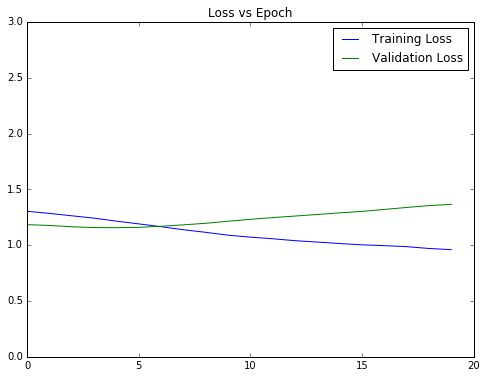

In [22]:
plt.figure(figsize=(8,6))
plt.plot(log.history['loss'], label='Training Loss')
plt.plot(log.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.ylim(0, 3)

### Is this an overfit?